In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# https://www.fda.gov/medical-devices/software-medical-device-samd/artificial-intelligence-and-machine-learning-aiml-enabled-medical-devices
file = '/Users/ianderrington/Downloads/Artificial Intelligence and Machine Learning (AIML)-Enabled Medical Devices  FDA.csv'
with open(file, 'r') as f:
    df = pd.read_csv(f,  encoding='unicode_escape')

In [11]:
df

,Date of Final Decision,Submission Number,Device,Company,Panel (Lead),Primary Product Code
0,07/29/2022,K213760,ABMD Software,HeartLung Corporation,Radiology,KGI
1,07/29/2022,K220961,Deep Learning Image Reconstruction,GE Healthcare Japan Corporation,Radiology,JAK
2,07/28/2022,K213998,cvi42 Auto Imaging Software Application,Circle Cardiovascular Imaging Inc,Radiology,QIH
3,07/28/2022,K221923,Swoop Portable MR Imaging System,"Hyperfine, Inc.",Radiology,LNH
4,07/27/2022,K210822,DeepRhythmAI,Medicalgorithmics S.A.,Cardiovascular,DQK
...,...,...,...,...,...,...
516,05/15/2008,K080762,"IB Neuro, Version 1.0","Imaging Biometrics, LLC",Radiology,LNH
517,02/10/2004,K033840,CellaVision DM96 Automatic Hematology Analyzer,Cella Vision AB,Hematology,JOY
518,03/15/2001,K003301,DiffMaster Octavia Automatic Hematology Analyzer,CellaVision AB,Hematology,JOY
519,03/11/1997,K955841,Compumedics Sleep Monitoring System,Computmedics Sleep Pty. Ltd.,Anesthesiology,MNR


Date of Final Decision
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
Name: Date of Final Decision, dtype: object

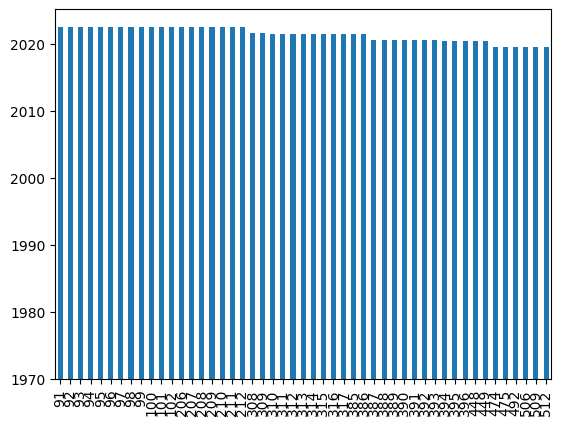

In [25]:
# df["Date of Final Decision"] = df["Date of Final Decision"].astype("datetime64[ns]")

# # df["Date of Final Decision"].groupby(df["Date of Final Decision"].dt.month).count().plot(kind="bar")
# df["Date of Final Decision"].groupby(df["Date of Final Decision"].dt.month).count().plot(kind="bar")


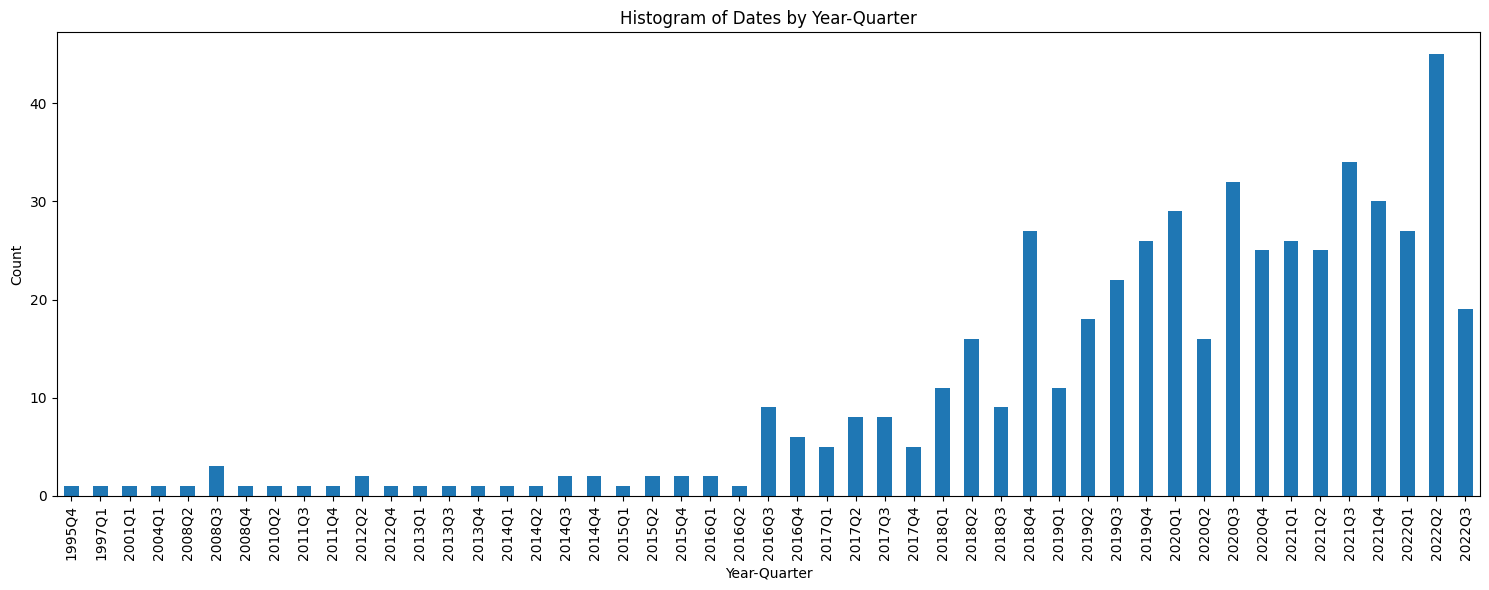

In [26]:
# df[].plot.hist()
df_grouped_quarter = df.groupby(df["Date of Final Decision"].dt.to_period("Q")).size()

# Plotting the data
plt.figure(figsize=(15, 6))
df_grouped_quarter.plot(kind='bar')
plt.title('Histogram of Dates by Year-Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

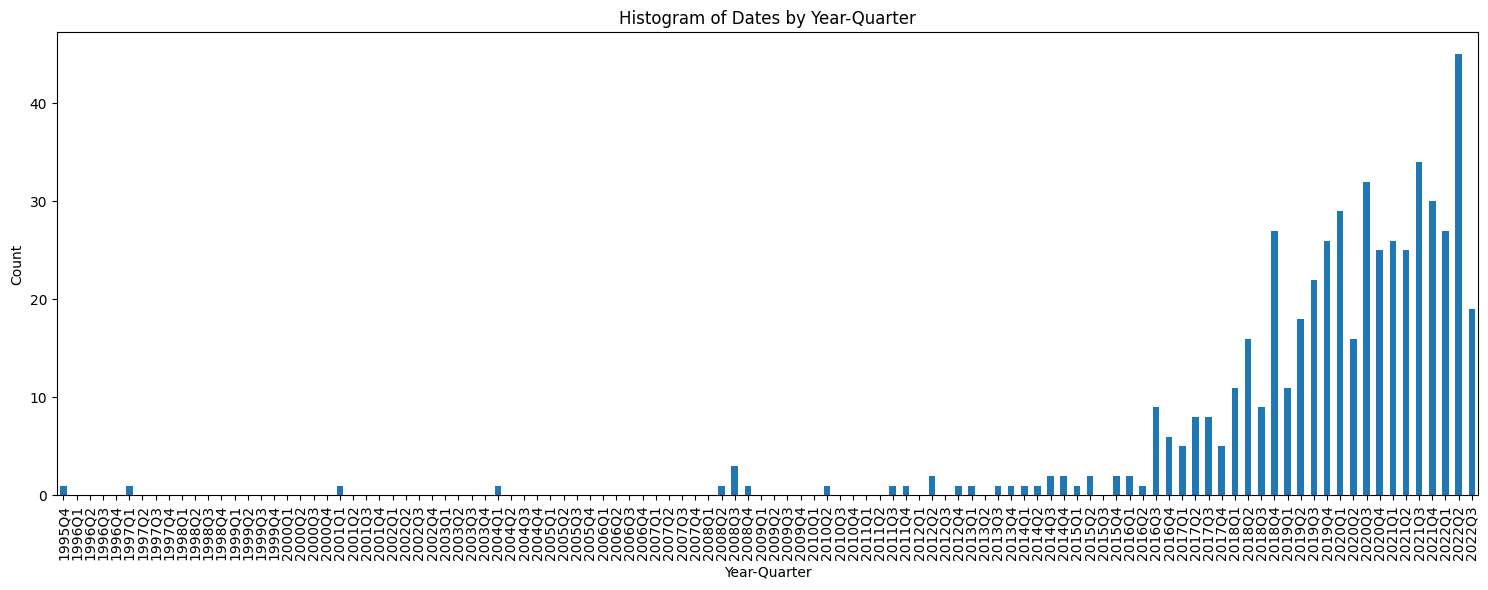

In [28]:

all_quarters = pd.period_range(start=df["Date of Final Decision"].min(), end=df["Date of Final Decision"].max(), freq='Q')

# Reindexing the grouped DataFrame to include all quarters, filling missing values with 0
df_grouped_quarter_reindexed = df_grouped_quarter.reindex(all_quarters, fill_value=0)

df_grouped_quarter = df_grouped_quarter_reindexed#df.groupby(df["Date of Final Decision"].dt.to_period("Q")).size()

# Plotting the data
plt.figure(figsize=(15, 6))
df_grouped_quarter.plot(kind='bar')
plt.title('Histogram of Dates by Year-Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [29]:
df_grouped_quarter_reindexed

1995Q4     1
1996Q1     0
1996Q2     0
1996Q3     0
1996Q4     0
          ..
2021Q3    34
2021Q4    30
2022Q1    27
2022Q2    45
2022Q3    19
Freq: Q-DEC, Length: 108, dtype: int64

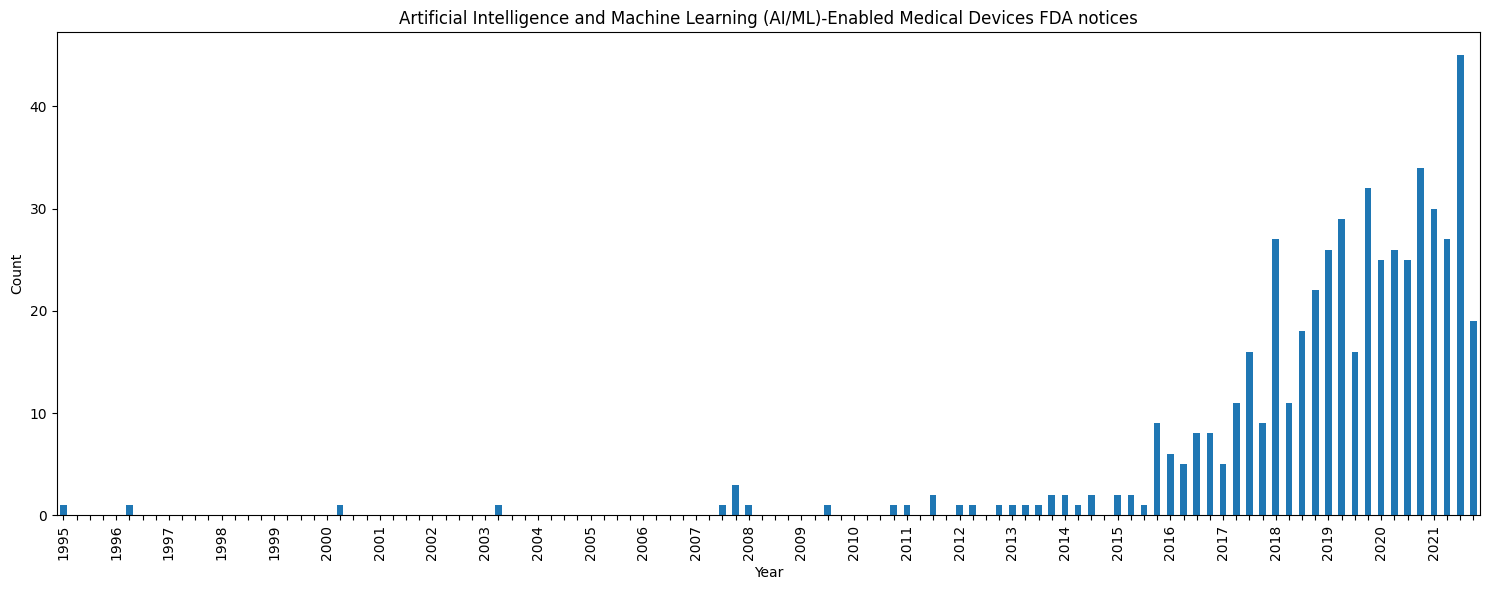

In [31]:
# Using just the year for the x-axis labels but keeping each quarter distinct in the plot
labels = [str(q.year) if i % 4 == 0 else '' for i, q in enumerate(df_grouped_quarter_reindexed.index)]

# Plotting the data with modified labels
plt.figure(figsize=(15, 6))
ax = df_grouped_quarter_reindexed.plot(kind='bar')
ax.set_xticklabels(labels)
plt.title('Artificial Intelligence and Machine Learning (AI/ML)-Enabled Medical Devices FDA notices')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()

plt.show()